In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DATAB.csv', 'DATAC.csv']


In [2]:
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data= data.sample(n=8000000, replace=True,random_state=40)

In [4]:
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06,8.000000e+06
mean,5.073236e+01,6.357066e+00,6.838216e-01,3.140962e-01,3.621555e+01,5.391203e+00,3.768915e+02,7.640537e+02,4.935292e+02,8.394107e+02,8.845107e+02,1.940693e+03,5.011622e+02,1.060003e+03,1.304796e+02,5.316306e+02,3.757252e+02,2.617935e+03,4.513216e+02,8.835154e+03
std,1.246497e+01,1.102066e+00,6.699615e-01,5.979036e-01,1.380110e+01,6.534111e+00,5.883827e+01,2.051994e+02,8.871803e+01,6.999620e+01,1.485401e+02,7.347123e+02,1.266501e+02,2.256839e+02,4.134368e+01,1.636273e+02,7.080528e+01,9.910758e+02,8.661335e+01,2.038377e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055973e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854578e+02,7.579315e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259337e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421665e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466287e+02,6.566271e+02,4.286127e+02,3.377095e+03,5.089867e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663723e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [5]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  8000000
The number of columns in dataset is -  20


In [6]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [9]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06
mean,5.073206e+01,6.357262e+00,6.837993e-01,3.141911e-01,3.621545e+01,5.391803e+00,3.768919e+02,7.640814e+02,4.935415e+02,8.393882e+02,8.845507e+02,1.940170e+03,5.011865e+02,1.059998e+03,1.304810e+02,5.317053e+02,3.756923e+02,2.617228e+03,4.513196e+02,8.834995e+03
std,1.246537e+01,1.102130e+00,6.700237e-01,5.979572e-01,1.380097e+01,6.536762e+00,5.883474e+01,2.052002e+02,8.872231e+01,6.999822e+01,1.485337e+02,7.344578e+02,1.266572e+02,2.256540e+02,4.134989e+01,1.635496e+02,7.078688e+01,9.907328e+02,8.661799e+01,2.038091e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709994e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056029e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854435e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259304e+02,5.468958e+02,3.755334e+02,2.566592e+03,4.421768e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466350e+02,6.566271e+02,4.285008e+02,3.377095e+03,5.089867e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06,1.600000e+06
mean,5.074024e+01,6.356490e+00,6.838172e-01,3.144032e-01,3.620562e+01,5.392742e+00,3.768608e+02,7.640575e+02,4.934995e+02,8.394497e+02,8.843995e+02,1.941374e+03,5.011254e+02,1.060059e+03,1.304851e+02,5.315495e+02,3.757764e+02,2.618846e+03,4.513400e+02,8.836913e+03
std,1.247226e+01,1.101675e+00,6.704234e-01,5.982302e-01,1.381100e+01,6.537012e+00,5.884710e+01,2.051902e+02,8.870191e+01,7.000595e+01,1.485758e+02,7.352337e+02,1.266537e+02,2.257450e+02,4.134936e+01,1.637616e+02,7.084817e+01,9.917782e+02,8.665454e+01,2.040253e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.462862e+01,3.321803e-03,1.708946e+02,3.715587e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055752e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854212e+02,7.579073e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259455e+02,5.468958e+02,3.757729e+02,2.566592e+03,4.421665e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466520e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.090150e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.055718e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [11]:
col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T"]
col_target = ["H2_P"]

In [12]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(5600000, 1)

In [13]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
count,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06,5.600000e+06
mean,5.073206e+01,6.357262e+00,6.837993e-01,3.141911e-01,3.621545e+01,5.391803e+00,3.768919e+02,7.640814e+02,4.935415e+02,8.393882e+02,8.845507e+02,1.940170e+03,5.011865e+02
std,1.246537e+01,1.102130e+00,6.700237e-01,5.979572e-01,1.380097e+01,6.536762e+00,5.883474e+01,2.052002e+02,8.872231e+01,6.999822e+01,1.485337e+02,7.344578e+02,1.266572e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02


In [14]:
target_vars.describe()

,H2_P
count,5.600000e+06
mean,1.304810e+02
std,4.134989e+01
min,3.397155e+01
25%,1.056029e+02
50%,1.259304e+02
75%,1.466350e+02
max,3.063698e+02


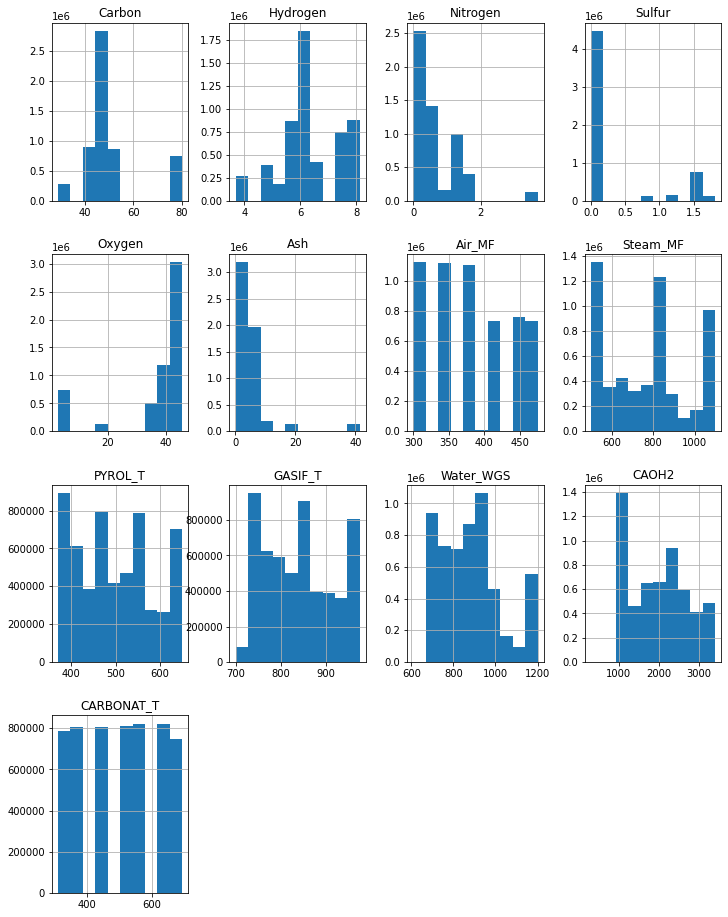

In [15]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

<AxesSubplot:>

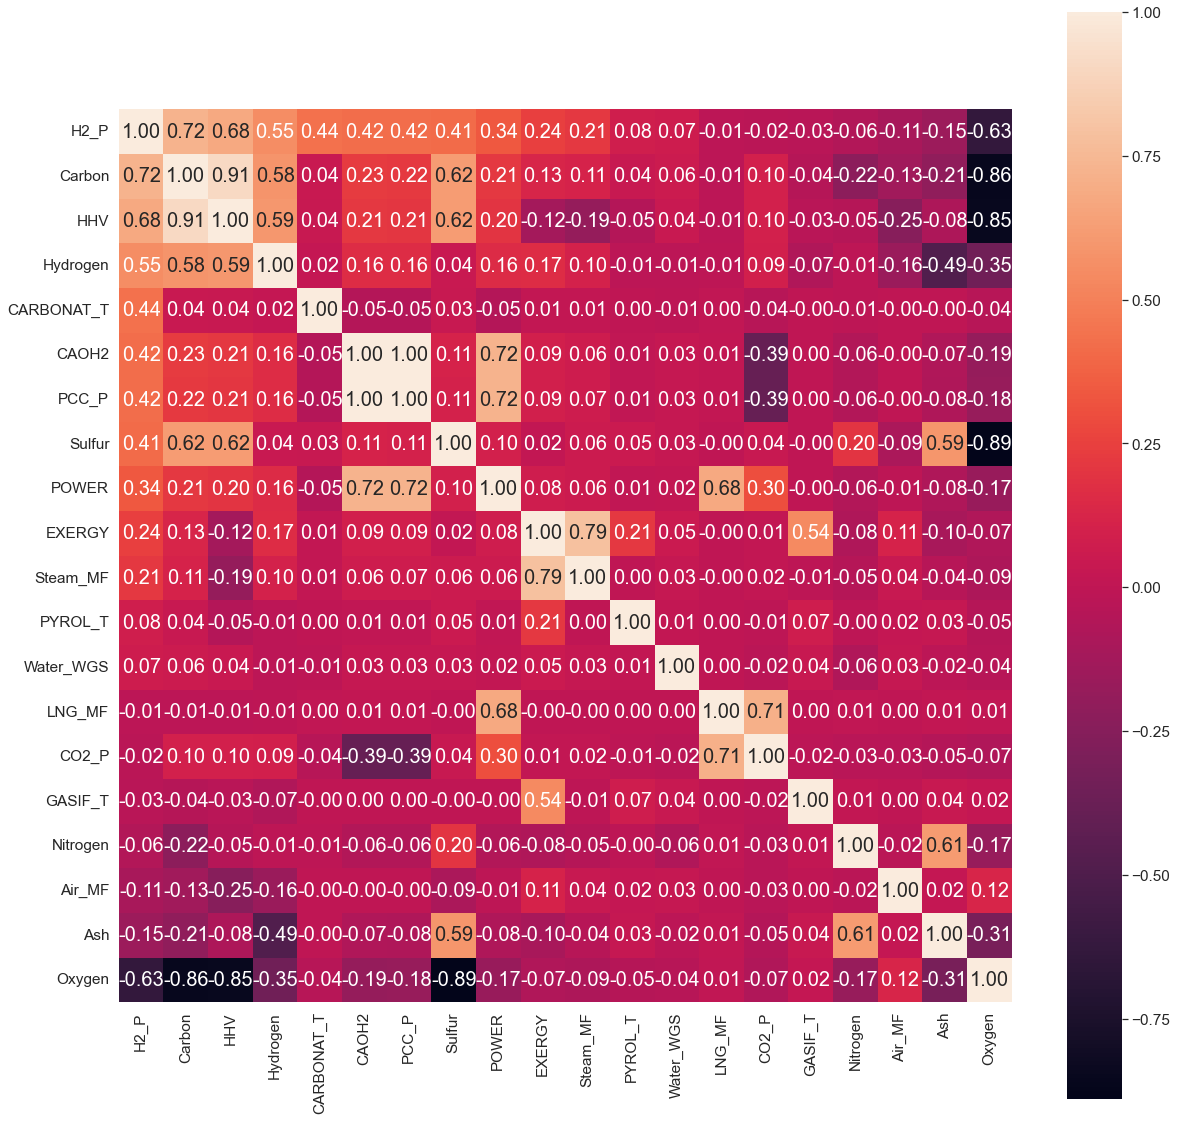

In [16]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'H2_P')['H2_P'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [17]:
train_X = train[col_randoms]
train_y = train[col_target]
train_X.shape

(5600000, 13)

In [18]:
test_X = test[col_randoms]
test_y = test[col_target]
test_X.shape

(1600000, 13)

In [19]:
valid_X = valid[col_randoms]
valid_y = valid[col_target]
valid_X.shape

(800000, 13)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values)]
test = test[list(test_X.columns.values)]
##
valid=valid[list(valid_X.columns.values)]
##
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [21]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
7595503,-0.563326,-0.460256,-1.005635,-0.525441,0.648111,0.047148,1.667520,-0.409753,1.335160,1.237343,0.373311,1.146193,-1.004179
9210065,0.255013,-0.227090,-0.482698,-0.525441,0.065666,-0.442391,1.072633,-0.799616,-1.054318,-1.277007,2.123756,0.353771,1.017024
12352996,2.369599,0.973332,-0.334017,2.116889,-2.395155,0.261322,-0.117141,-1.286945,1.650752,-1.277007,-0.232612,-0.871623,-0.498878
11051040,-1.755428,-2.175118,-0.005670,1.431221,0.667674,2.221008,-1.306914,0.028843,0.320759,1.223057,-0.973185,-1.007777,-0.498878
8744944,-0.109268,1.345339,0.889820,-0.341481,-0.082273,0.019612,1.667520,0.077576,-0.772540,-0.562703,0.305986,-0.190848,0.006423


In [22]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
10082299,-0.556454,-1.303915,1.247246,-0.241384,-0.152460,0.322358,-0.711349,-0.945745,0.298759,-0.920632,-0.971892,-0.620720,0.006905
2057327,-0.156590,1.610920,1.001431,-0.525556,0.168039,-0.335435,-0.116587,0.175167,-1.392299,-1.277745,0.441529,-1.280375,1.522851
6224826,-0.392089,-0.205587,-0.497920,-0.525556,0.622286,-0.385917,0.478174,1.637225,0.636971,1.222044,-1.241115,0.814198,-1.509040
10669469,-0.100241,0.275499,0.232962,-0.408544,0.419549,-0.681159,-1.306111,-0.653333,0.298759,-0.920632,-0.231529,-0.600319,1.017535
3192422,-0.156590,1.610920,1.001431,-0.525556,0.168039,-0.335435,1.072936,0.175167,0.636971,0.150706,2.124172,-0.464307,-0.498410


In [23]:
sc_valid.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
214799,-0.226448,-0.051559,-0.544400,-0.507341,0.582915,-0.642721,1.666245,1.638047,1.651230,0.150213,0.441352,-0.874296,1.524051
9462872,0.256452,-0.226650,-0.484005,-0.524095,0.064256,-0.443019,-0.118095,1.638047,-1.392042,1.579549,-1.241998,-1.282212,1.524051
9014372,-0.108352,1.345395,0.891434,-0.339801,-0.083884,0.020904,-1.307656,0.419798,-1.392042,0.150213,2.124703,1.845147,-0.498173
4138854,-0.391140,-0.205769,-0.499530,-0.524095,0.621371,-0.386181,-0.118095,1.638047,-0.715759,-0.564455,0.845357,-0.466379,1.018495
11722679,-1.621347,-2.423206,4.489247,2.514242,-1.266673,5.548038,0.476685,-0.359882,-1.053900,-0.207121,0.407685,-0.126449,1.524051


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
models = [
           ['RandomForest ',RandomForestRegressor()],
         ]

In [26]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Valid_R2_Score"]=metrics.r2_score(valid_y, curr_model.predict(valid_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["Valid_RMSE_Score"] = sqrt(mean_squared_error(valid_y,curr_model.predict(valid_X)))

    model_data.append(curr_model_data)

In [27]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80,150],
              'n_estimators' : [100,200],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200]}],
             scoring='r2', verbose=2)

In [28]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 100}

In [29]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, random_state=40)

In [30]:
grid_search.best_estimator_.score(train_X,train_y)

0.9999993420845499

In [31]:
grid_search.best_estimator_.score(test_X,test_y)

0.999995830525634

In [32]:
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.0844324253321806

In [33]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

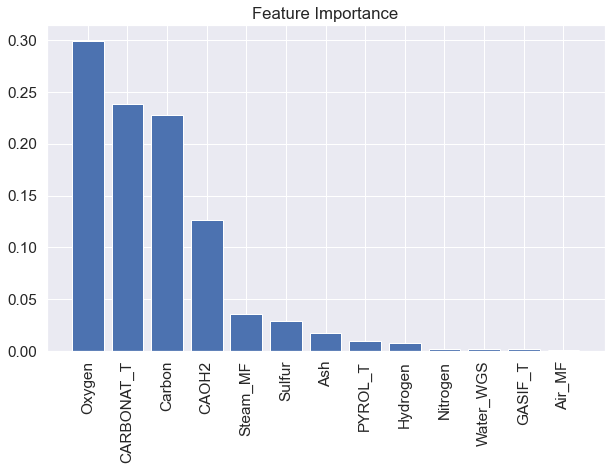

In [34]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [35]:
names[0:5]

['Oxygen', 'CARBONAT_T', 'Carbon', 'CAOH2', 'Steam_MF']

In [36]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [37]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

RandomForestRegressor(max_depth=80, random_state=40)

In [38]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9860927733902378
Testing set R2 Score -  0.9860201880769728
Testing set RMSE Score -  4.888991417709559


In [39]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,RandomForest,2862.822279,0.999999,0.999996,0.999996,0.085021,0.084431
